# **Libraries :-**

In [13]:
import os
import cv2
import random
import numpy as np
from PIL import Image
import seaborn as sns
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

c:\Users\Utente\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Configurations :-**

In [4]:
dataset_path = "ships-in-aerial-images/ships-aerial-images"

train_images_path = os.path.join(dataset_path, "train/images")
train_labels_path = os.path.join(dataset_path, "train/labels")

test_images_path = os.path.join(dataset_path, "test/images")
test_labels_path = os.path.join(dataset_path, "test/labels")

valid_images_path = os.path.join(dataset_path, "valid/images")
valid_labels_path = os.path.join(dataset_path, "valid/labels")

# **Exploratory Data Analysis :-**

In [5]:
num_train_images = len(os.listdir(train_images_path))
num_test_images = len(os.listdir(test_images_path))
num_valid_images = len(os.listdir(valid_images_path))

print("Training Images : {}".format(num_train_images))
print("Testing Images : {}".format(num_test_images))
print("Valid Images : {}".format(num_valid_images))

print("Total Images : {}".format(num_train_images + num_test_images + num_valid_images))

Training Images : 9697
Testing Images : 1573
Valid Images : 2165
Total Images : 13435


In [6]:
img = cv2.imread(os.path.join(valid_images_path, random.choice(os.listdir(valid_images_path))))

print("Image Dimensions : {} X {}".format(img.shape[0], img.shape[1]))
print("Image Channels : {}".format(img.shape[2]))

Image Dimensions : 416 X 416
Image Channels : 3


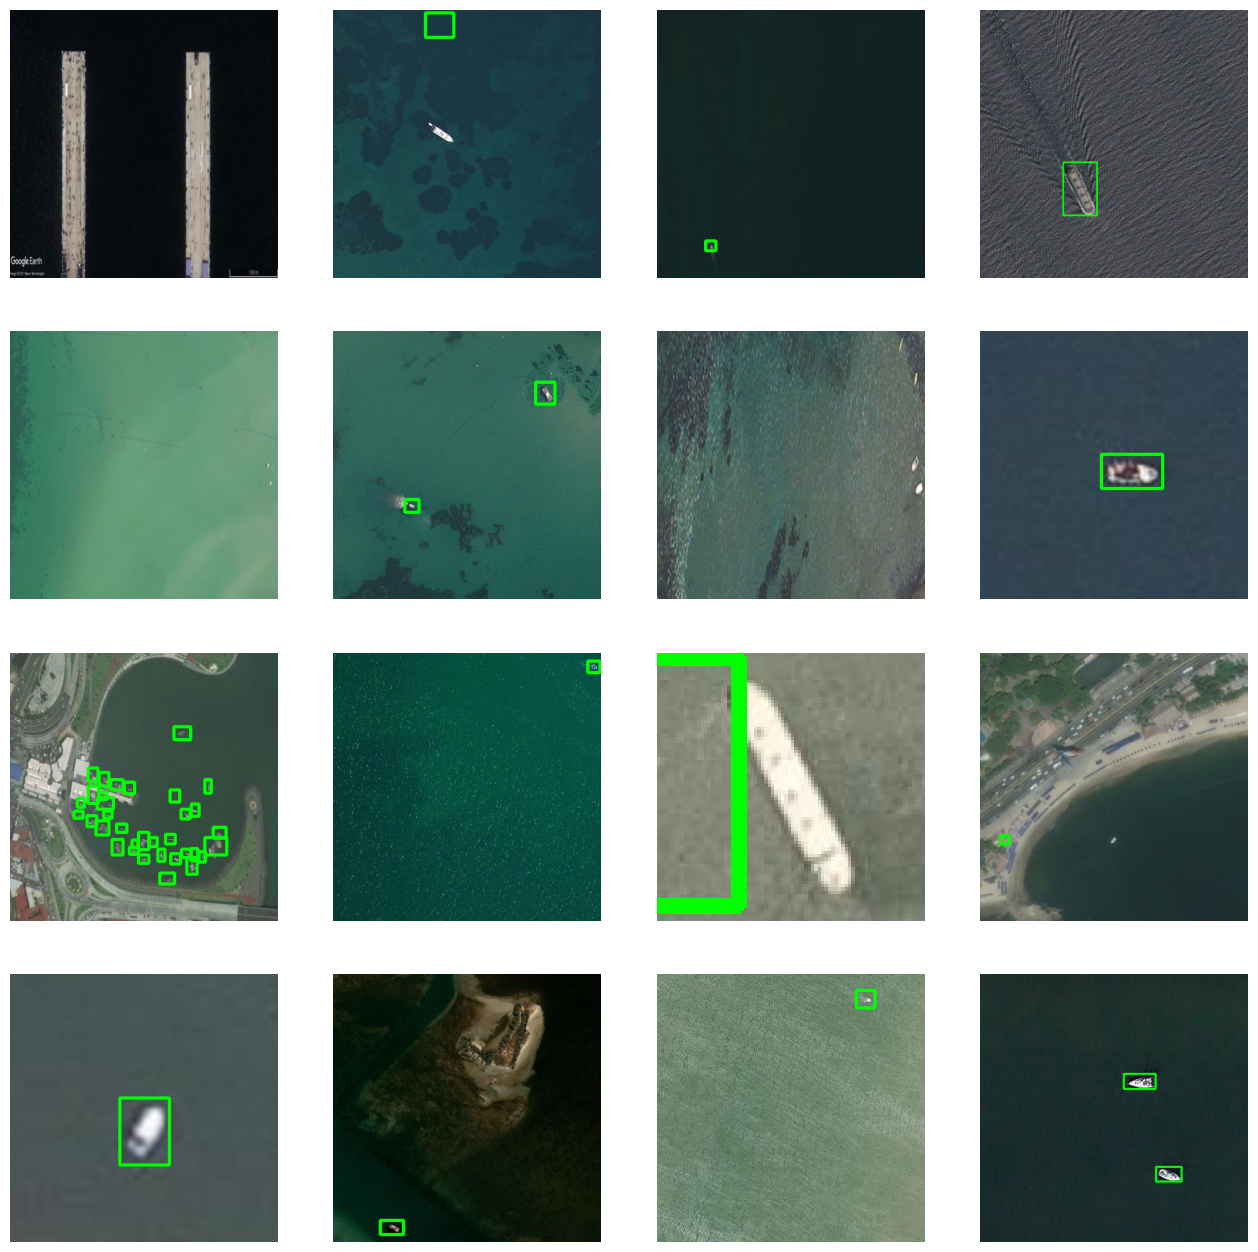

In [7]:
# Sample Images with Labels

random_img_paths = random.sample(os.listdir(valid_images_path), 16)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i, image_path in enumerate(random_img_paths):
  row, col = i // 4, i % 4

  image = cv2.imread(os.path.join(valid_images_path, image_path))

  label_file = os.path.splitext(image_path)[0] + ".txt"
  label_path = os.path.join(valid_labels_path, label_file)

  with open(label_path, "r") as f:
    labels = f.read().strip().split("\n")

  for label in labels:
    if len(label.split()) != 5:
        continue

    class_id, x_center, y_center, width, height = map(float, label.split())
    x_min = int((x_center - width/2) * image.shape[1])
    y_min = int((y_center - height/2) * image.shape[0])
    x_max = int((x_center + width/2) * image.shape[1])
    y_max = int((y_center + height/2) * image.shape[0])
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

  axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  axs[row, col].axis('off')

plt.show()

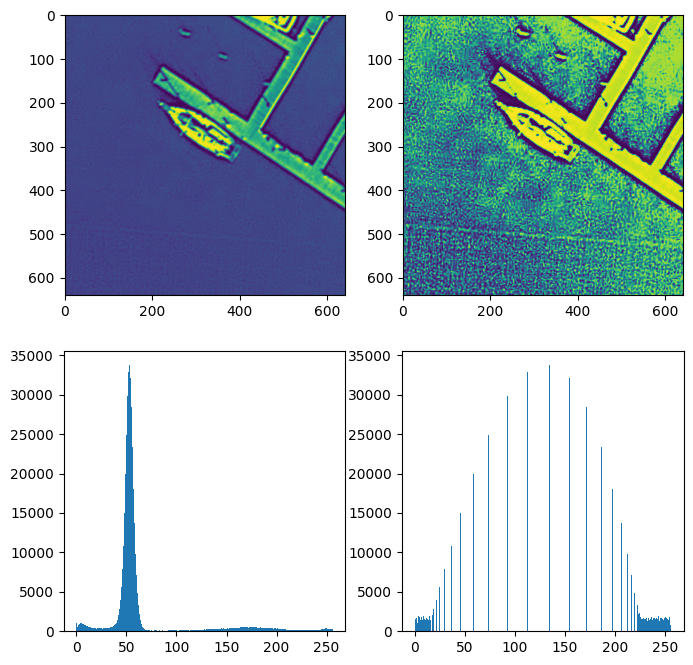

In [8]:
# Intensity Distribution in Random Image

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

random_img = cv2.imread(os.path.join(valid_images_path, random.choice(os.listdir(valid_images_path))), cv2.IMREAD_GRAYSCALE)
eq_random_img = cv2.equalizeHist(random_img)

axs[0, 0].imshow(random_img)
axs[0, 1].imshow(eq_random_img)
axs[1, 0].hist(random_img.ravel(), bins=256, range=(0, 256))
axs[1, 1].hist(eq_random_img.ravel(), bins=256, range=(0, 256))

plt.show()

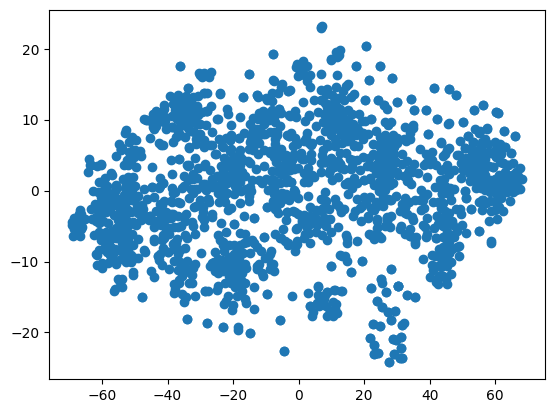

In [9]:
# Scatter-Plot for t-SNE Embedding (Probabilistic in Nature)

images = []

for filename in os.listdir(test_images_path):
    filepath = os.path.join(test_images_path, filename)
    if os.path.isfile(filepath):
        img = Image.open(filepath)
        img = img.convert('RGB')
        img = img.resize((50, 50))
        images.append(np.array(img).flatten())

# Apply t-SNE to the image data
images = np.array(images)
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
embeddings = tsne.fit_transform(images)

plt.scatter(embeddings[:, 0], embeddings[:, 1])
plt.show()

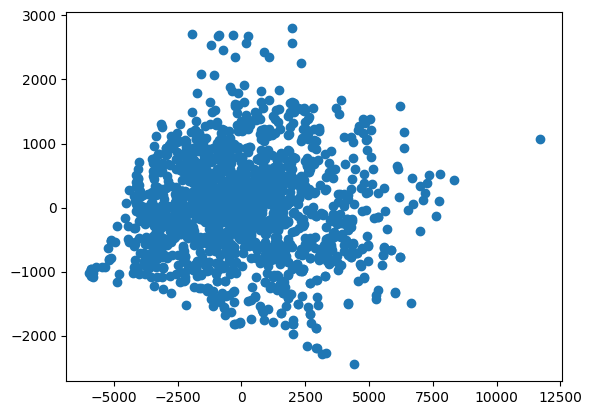

In [14]:
# Image Feature Visualization with PCA (Mathematical in Nature)

pca = PCA(n_components=2)
embeddings = pca.fit_transform(images)

plt.scatter(embeddings[:, 0], embeddings[:, 1])
plt.show()

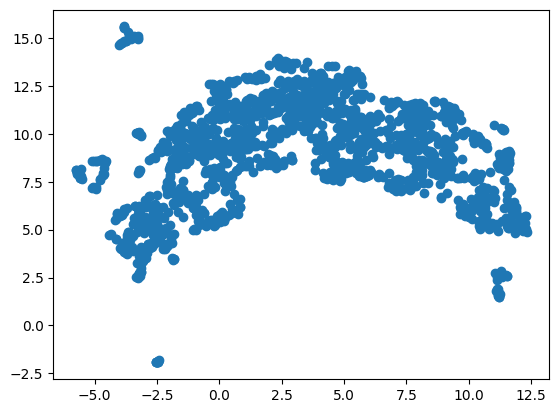

In [15]:
umap_embedding = umap.UMAP(n_neighbors=5, min_dist=0.3).fit_transform(images)

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1])
plt.show()

<Axes: >

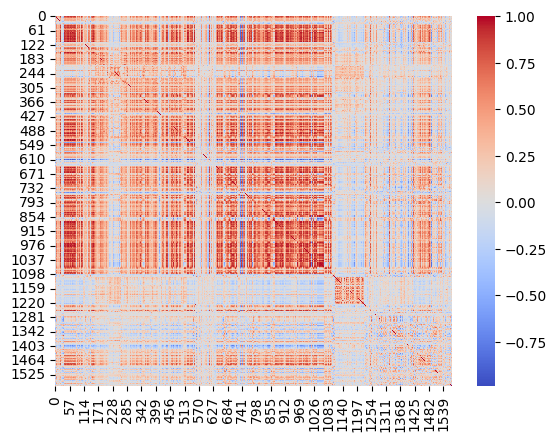

In [16]:
img_corr = np.corrcoef(images)
sns.heatmap(img_corr, cmap='coolwarm')